In [ ]:
import numpy as np # Processing and loading the dataset 
import matplotlib.pyplot as plt
import torch.optim
import torch.nn as nn
import torch.optim as optim  # Class that contains man

# In case your data sets is not as depurated as this one you can use the following libraries to do the preprocessing

#import torchvision.transforms as transforms 
# The transformations that needs to be done before training ( Since it is a very curated data set this would not be needed very much)
# EJ Gray Scale to RGB  or viceversa
# Normalize the data
# Resize the data
# Rotate the data
# Crop the data
# Flip the data
# Convert the data to a tensor
# Convert the data to a numpy array
# Convert the data to a PIL image
# Batch Size
# https://pytorch.org/vision/0.9/transforms.html


from torchvision import datasets
# For operating vision tasks on images
# Take into account as said in the documentation taht every dataset are subclasses of torch.utils.data.Dataset, which implies it inherits its properties
# __getitem__ and __len__ methods Implemented 

#Between the datasets supported there is the one that is interesting to us MNIST from which we are going to extract the material.
# https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html
# https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
# https://pytorch.org/vision/0.8/datasets.html

from torch.utils.data import TensorDataset, DataLoader #???


# The dataset is available here  https://github.com/rois-codh/kmnist ( Kuzushi MNIST with the lower ammount of samples )
# Note it alreay is in Gray Scale and the images are 28x28, so we dont need to do a most procesossessing ( Since the data is already "homogeneous" for training the model)

# As well as the paper with the backgorund of why this was done https://arxiv.org/pdf/1812.01718


NPZ_Test_Images = np.load('/home/asperjasp/asperjasp/Proyects/ML_Proyects/Kanji_CNN/data/Recognition_data/raw/kmnist-test-imgs.npz')
NPZ_Test_Labels = np.load('/home/asperjasp/asperjasp/Proyects/ML_Proyects/Kanji_CNN/data/Recognition_data/raw/kmnist-test-labels.npz')

NPZ_Train_Images = np.load('/home/asperjasp/asperjasp/Proyects/ML_Proyects/Kanji_CNN/data/Recognition_data/raw/kmnist-train-imgs.npz')
NPZ_Train_Labels = np.load('/home/asperjasp/asperjasp/Proyects/ML_Proyects/Kanji_CNN/data/Recognition_data/raw/kmnist-train-labels.npz')


#Check for the information we have all the data in ['arr_0']
print(NPZ_Test_Images.files)
print(NPZ_Test_Labels.files)
print(NPZ_Train_Images.files)
print(NPZ_Train_Labels.files)

# Checking the shape of the data ( Since we are loaded the data no t doing the recomended way)
print(type(NPZ_Test_Images)) #Numpy NpzFile
print(type(NPZ_Test_Images['arr_0'])) #Numpy Ndarray

img_size = 28 # For the pytorch training.


print(NPZ_Test_Images['arr_0'].shape) # (10000 Grayscale Images , 28 Height , 28 Width)  28x28 = 784 pixels for each image
print(NPZ_Test_Labels['arr_0'].shape) # (10000,)
print(NPZ_Train_Images['arr_0'].shape) # (60000, 28, 28)
print(NPZ_Train_Labels['arr_0'].shape) # (60000,)

# Rename it to work with NDARRAYS not at NPZfile objects
Test_Images = NPZ_Test_Images['arr_0'] #  X train
Test_Labels = NPZ_Test_Labels['arr_0'] # Y train
Train_Images = NPZ_Train_Images['arr_0'] # X test
Train_Labels = NPZ_Train_Labels['arr_0'] # Y test

# Checking the content of the  value
print(Test_Labels[:1])
print(Train_Labels[:1])

# Checking the content of the  value
print(Test_Images[:1])
print(Train_Images[:1])




['arr_0']
['arr_0']
['arr_0']
['arr_0']
<class 'numpy.lib.npyio.NpzFile'>
<class 'numpy.ndarray'>
(10000, 28, 28)
(10000,)
(60000, 28, 28)
(60000,)
[2]
[8]
[[[  0  97  35   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0  34 143   5   0   0   0   0   0   0   0   0   0   0   0  25  20
     0   0   0  30 127 117  34   0   0   0   0]
  [  0   0  49  89   0   0   0   0   0   0   0   0   0   0  77 238 235
    39  20 133 181 165 210 243  82   0   0   0]
  [  0   0   0 134   0   0   0   0   0   0   0   0   2 126 145 227 255
   235 238 138   8   0  16 236 173   0   0   0]
  [  0   0   0 173   5   0   0   0   0   0   0   0 133  94   2 207 255
   255 172   0   2   8   0 172 180   0   0   0]
  [  0   0   0 164   8   0   0   0   0   0   0  90  71   0  11 236 251
   223  43   6 167 182  41 233 133   0   0   0]
  [  0   0   0 204  30   0   0   0   0   0  47  73   0   0  88 255 233
    59   0  89 255 238 234 230  14   0   0   0]
  [  0   0 

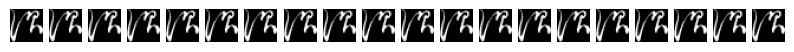

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a 4x5 grid of subplots
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

# Example data to plot
data = np.random.rand(20, 10)

# Plot data in each subplot
for i, ax in enumerate(axes.flat):
    ax.plot(data[i])
    ax.set_title(f"Plot {i+1}")

plt.tight_layout()
plt.show()

Training data shape: torch.Size([60000, 1, 28, 28])
Training labels shape: torch.Size([60000])
Testing data shape: torch.Size([10000, 1, 28, 28])
Testing labels shape: torch.Size([10000])
Number of kanji classes: 10
Using device: cpu
KanjiCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1152, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
Epoch 1/10, Loss: 0.3169, Accuracy: 0.9108
Epoch 2/10, Loss: 0.1009, Accuracy: 0.9702
Epoch 3/10, Loss: 0.0739, Accuracy: 0.9780
Epoch 4/10, Loss: 0.0661, Accuracy: 0.9794
Epoch 5/10, Loss: 0.0553, Accuracy: 0.9830
Epoch 6/10, Loss: 0.0571, Accuracy: 0.9839
Epoch 7/10, L

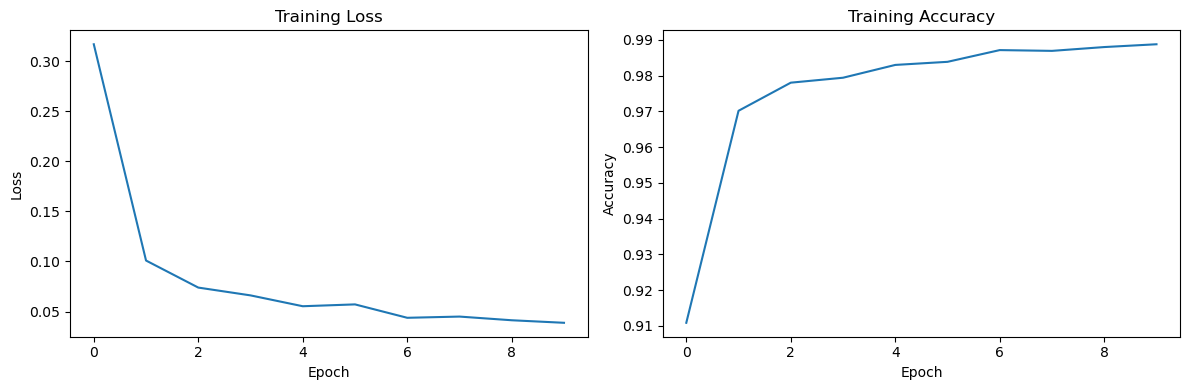

In [ ]:
# In this case we are not going to use data augmentation since the data is already very curated, even though in General CNN generalize better
# ( It involves creating more data by performing simple tasks to the data like rotating, flipping, cropping, etc)

# Frist since we will be working with pytorch we need to convert the data to tensors
# Convert the numpy arrays to tensors
X_train = torch.FloatTensor(Train_Images).unsqueeze(1) # Adding the channel dimensions
y_train = torch.LongTensor(Train_Labels)
X_test = torch.FloatTensor(Test_Images).unsqueeze(1) # Adding the channel dimensions
y_test = torch.LongTensor(Test_Labels)

# Check the shape of your data
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")


# Since the processing of pytorch data comes with train_loader and test_loader we need to create them  ( Not all the four X_train, y_train, X_test, y_test) like in Sci-kit learn} wo we join them 
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 64 # Which in the trannin set it means 60 000  % 64 = 937.5 Which means the last batch is smaller ( There is no problem with this)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # Since thi is for traninning the data
# The data is shuffled for preventing the model to learn the order of the data as it is not an intented feature
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Step 2: Create the model class ( If you dont know a class is basically a blueprint or abstraction of an object, which atributes and actions EJ a robot you know is  a robot because has metal human shape, and what can the robot do?, walk, talk, etc the same for models, they have layers, activation functions, etc)

class KanjiCNN(nn.Module):
    def __init__(self, num_classes):
        super(KanjiCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Calculate the size after convolutions and pooling
        fc_input_size = 128 * (img_size // 8) * (img_size // 8)
        
        # Fully connected layers
        self.fc1 = nn.Linear(fc_input_size, 512)
        self.fc2 = nn.Linear(512, num_classes)
        
        # Dropout for regularization
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        # First convolutional block
        x = self.pool(torch.relu(self.conv1(x)))
        
        # Second convolutional block
        x = self.pool(torch.relu(self.conv2(x)))
        
        # Third convolutional block
        x = self.pool(torch.relu(self.conv3(x)))
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Fully connected layers
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        
        return x

# Get the number of classes from your data
num_classes = len(torch.unique(y_train))
print(f"Number of kanji classes: {num_classes}")

# Initialize the model ( Practica común si se tiene GPU usar CUDA )
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = KanjiCNN(num_classes).to(device)
print(model)

# Step 3: Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Training loop
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    train_losses = []
    train_accs = []
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            # Statistics
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / total
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)
        
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    return train_losses, train_accs

# Step 5: Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')
    return accuracy

# Step 6: Train the model
num_epochs = 10
train_losses, train_accs = train_model(model, train_loader, criterion, optimizer, num_epochs)

# Step 7: Evaluate on test data
test_accuracy = evaluate_model(model, test_loader)

# Step 8: Plot training progress
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accs)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()